In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import PIL
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.vlc import VLC
from utils.path_utils import Files
from evaluation.simulator import TimingConfig
from evaluation.analysis import Plotter

%matplotlib qt
pd.options.display.max_columns = 30

# Analysis

## VLC

In [ ]:

directory = "/Users/guycohen/Desktop/Bio-Project/eval/micro"
files = Files(directory, extension='png', sorting_key=lambda f: int(f.split('_')[-1].split('.')[0]))
timing_config = TimingConfig.load_json("/Users/guycohen/Desktop/Bio-Project/time_config.json")
# log_path = "/Users/guycohen/Desktop/Bio-Project/eval/bboxes2.csv"
# log_path = "/Users/guycohen/Desktop/Bio-Project/Optimal/bboxes.csv"
log_path = "/Users/guycohen/Desktop/Bio-Project/PolyfitController2/bboxes.csv"


In [ ]:
import cProfile
vlc = VLC(None, timing_config, log_path, 'plt')
vlc.print_hotkeys()
vlc.streamer.update_trakbar("delay", 1)
vlc.show_cam = True
vlc.show_micro = True
vlc.show_pred = True
vlc.play = True
vlc.mainloop()
# cProfile.run('vlc.mainloop()')


In [ ]:
vlc = VLC(files, timing_config, log_path, 'mic')
vlc.print_hotkeys()
vlc.mainloop()

## Plots

In [ ]:
def cond(df: pd.DataFrame, threshold: float=1.5) -> pd.DataFrame:
    mask1 = (df['cycle_step'] == 14) & (df['worm_center_dist'] > threshold)
    cycles = df[mask1]['cycle'].unique()
    return df['cycle'].isin(cycles)

def cond_imaging(df:pd.DataFrame) -> pd.DataFrame:
    return df['phase'] == 'imaging'

def rolling_avg(data, col, window_size=5):
    data[col+'_avg'] = Plotter.rolling_average(data, window_size=window_size, column=col)
    return data

In [2]:

# original_log_path = "/Users/guycohen/Desktop/Bio-Project/eval/bboxes2.csv"
# log_path = "/Users/guycohen/Desktop/Bio-Project/eval_corrected_movement/bboxes.csv"
# log_path = "/Users/guycohen/Desktop/Bio-Project/Optimal/bboxes.csv"
# log_path = "/Users/guycohen/Desktop/Bio-Project/Controller2/bboxes.csv"
log_path = "/Users/guycohen/Desktop/Bio-Project/PolyfitControllerV2/bboxes.csv"
# log_path = "/Users/guycohen/Desktop/Bio-Project/test1/bboxes.csv"
timing_config = TimingConfig.load_json("/Users/guycohen/Desktop/Bio-Project/time_config.json")

pltr = Plotter(log_path, timing_config)
# pltr_orig = Plotter(original_log_path, timing_config)

In [3]:
data = pltr.print_statistics(n=10)
# data_orig = pltr_orig.print_statistics()

##################### No Preds #####################
Num of No Preds: 2
No prediction in frames: [21997, 22004]
corresponding cycle steps: [7, 14]
##################### Cycles #####################
Num of cycles: 4079
##################### Area Diff #####################
Non Perfect Predictions: 25.003%
##################### General #####################


,frame,cycle,plt_x,plt_y,cam_x,cam_y,cam_w,cam_h,mic_x,mic_y,mic_w,mic_h,wrm_x,wrm_y,wrm_w,wrm_h,cycle_step,wrm_center_x,wrm_center_y,mic_center_x,mic_center_y,wrm_speed,wrm_speed_x,wrm_speed_y,bbox_area_diff,bbox_edge_diff,worm_angle,worm_deviation_x,worm_deviation_y,worm_deviation
count,61168.00000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.0,61168.0,61168.000000,61168.000000,61168.0,61168.0,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,6.116800e+04,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000
mean,30599.78116,2039.518752,1266.026370,1121.181255,1266.026370,1121.181255,360.0,360.0,1436.026370,1291.181255,20.0,20.0,1440.000417,1294.577075,12.051560,13.216043,6.999886,1446.026198,1301.185097,1446.026370,1301.181255,0.207453,0.003313,-0.006482,3.342644e-02,0.465178,-0.082266,-0.000172,0.003842,2.299364
std,17658.62255,1177.241464,192.811796,215.168354,192.811796,215.168354,0.0,0.0,192.811796,215.168354,0.0,0.0,192.930700,215.296983,3.071933,3.213247,4.320507,192.784428,215.131392,192.811796,215.168354,0.176840,0.183396,0.201551,1.011394e-01,1.348395,1.778337,2.105662,2.370710,2.183331
min,15.00000,1.000000,881.000000,540.000000,881.000000,540.000000,360.0,360.0,1051.000000,710.000000,20.0,20.0,1055.408157,712.498398,5.599228,5.907318,0.000000,1063.626976,720.871139,1061.000000,720.000000,0.000042,-1.344165,-1.366954,-2.349879e-14,0.000000,-3.119770,-15.893387,-18.642906,0.001102
25%,15306.75000,1020.000000,1149.000000,1029.000000,1149.000000,1029.000000,360.0,360.0,1319.000000,1199.000000,20.0,20.0,1323.438797,1200.453552,9.543140,10.763744,3.000000,1329.220699,1208.109913,1329.000000,1209.000000,0.067212,-0.081271,-0.105011,-3.786013e-15,0.000000,-1.718164,-0.886137,-0.968460,0.848821
50%,30600.50000,2040.000000,1169.000000,1179.000000,1169.000000,1179.000000,360.0,360.0,1339.000000,1349.000000,20.0,20.0,1341.207878,1351.909805,11.857757,14.263977,7.000000,1348.399212,1359.554062,1349.000000,1359.000000,0.174727,0.000405,-0.003484,3.866254e-15,0.000000,-0.170809,-0.009190,-0.011059,1.689524
75%,45892.25000,3059.000000,1489.250000,1260.000000,1489.250000,1260.000000,360.0,360.0,1659.250000,1430.000000,20.0,20.0,1663.594215,1434.803226,14.521546,15.803894,11.000000,1669.461699,1440.438513,1669.250000,1440.000000,0.299909,0.082238,0.087321,6.698092e-06,0.000107,1.401693,0.880661,0.971439,3.000468
max,61184.00000,4078.000000,1553.000000,1396.000000,1553.000000,1396.000000,360.0,360.0,1723.000000,1566.000000,20.0,20.0,1726.091202,1560.643234,19.665741,19.883560,14.000000,1729.797531,1569.973503,1733.000000,1576.000000,1.596883,1.032538,1.590397,1.000000e+00,26.373230,3.141593,16.558983,29.235321,29.290307


In [ ]:
(data['mic_center_x'] - data['wrm_center_x']).hist(bins=15)

In [ ]:
sns.scatterplot(data=data, x='frame', y='worm_deviation', hue='wrm_speed')

In [ ]:
def plot_histogram(pltr, x_col:str, n:int=1, hue=None, condition=None, **kwargs):
    data = pltr.data_prep_frames(n=n)
    
    if condition is not None:
            data = data[condition(data)]
    fig, ax = plt.subplots()
    sns.histplot(data=data, x=x_col, hue=hue,stat='density', **kwargs)

def plot_jointplot(pltr, x_col:str, y_col:str, n:int=1, kind:str='scatter', hue=None, condition=None, transform=None, **kwargs):
    data = pltr.data_prep_frames(n=n)
    
    if transform is not None:
        data = transform(data)
        
    if condition is not None:
            data = data[condition(data)]
    
    sns.jointplot(data=data, x=x_col, y=y_col, hue=hue, kind=kind, **kwargs)

# plot_histogram(pltr, 'worm_deviation', n=15, hue='worm_deviation')

In [ ]:
plot_jointplot(pltr, 'wrm_speed', 'worm_deviation', n=5, kind='scatter')

In [ ]:
plot_jointplot(pltr, x_col='wrm_speed_x', y_col='wrm_speed_y', n=5, kind='scatter', hue='worm_angle_avg', transform=lambda data: rolling_avg(data, 'worm_angle', window_size=5))

In [ ]:
plot_histogram(pltr, x_col='bbox_area_diff', condition=lambda df: df['bbox_area_diff'] > 1e-3)

In [ ]:
def avg_speed(data:pd.DataFrame, n_list:list[int]=[10]) -> np.ndarray:
    data = data.copy()
    
    wrm_speed_x = np.zeros(len(data['frame']))
    wrm_speed_y = np.zeros(len(data['frame']))
    for n in n_list:
        wrm_speed_x += data["wrm_center_x"].diff(n) / len(n_list)
        wrm_speed_y += data["wrm_center_y"].diff(n) / len(n_list)
        # avgs.append(Plotter.worm_angle(data, n=n))
    # mean of all averages
    data['wrm_speed_x_avg'] = wrm_speed_x
    data['wrm_speed_y_avg'] = wrm_speed_y
    return data

def worm_angle(data:pd.DataFrame, n:int=15) -> np.ndarray:
    data = data.copy()

    wrm_speed_x = data["wrm_center_x"].diff(n) / n
    wrm_speed_y = data["wrm_center_y"].diff(n) / n
    angle_speed = np.arctan2(wrm_speed_y, wrm_speed_x)

    min_h, min_w = np.min(data["wrm_h"]), np.min(data["wrm_w"])
    x_sign = np.sign(data["wrm_center_x"].diff(3))
    y_sign = np.sign(data["wrm_center_y"].diff(3))
    # data['wrm_speed_x_avg'] = (data['wrm_w']-min_w)*x_sign
    # data['wrm_speed_y_avg'] = (data['wrm_h']-min_h)*y_sign
    angle = np.arctan2((data['wrm_h']-min_h)*y_sign, (data['wrm_w']-min_w)*x_sign)

    angle_diff = np.abs(angle - angle_speed) / (2*np.pi)
    data['wrm_speed_x_avg'] = wrm_speed_x * (1-angle_diff)
    data['wrm_speed_y_avg'] = wrm_speed_y * (1-angle_diff)
    return data

In [ ]:
def plot_flow(pltr, x_col:str, y_col:str, n:int=1, kind:str='scatter', hue=None, condition=None, transform=None, **kwargs):
    data = pltr.data_prep_frames(n=n)
    
    if transform is not None:
        data = transform(data)
        
    if condition is not None:
            data = data[condition(data)]
    
    # cmap = sns.color_palette("husl", as_cmap=True, n_colors=len(data['frame']))
    fig, ax = plt.subplots()
    plt.quiver(data[x_col], data[y_col], data['wrm_speed_x_avg'], data['wrm_speed_y_avg'], np.linspace(0,1,len(data['frame'])), **kwargs)
    ax.invert_yaxis()
    ax.grid()


# plot_flow(pltr, x_col='wrm_center_x', y_col='wrm_center_y', n=15, angles='xy', transform=lambda data: rolling_avg(data, 'worm_angle', window_size=1))
plot_flow(pltr, x_col='wrm_center_x', y_col='wrm_center_y', n=5, angles='xy', scale_units='xy', scale=1,
          transform=lambda df: worm_angle(df, 15), 
        #   condition=lambda df: df['cycle_step'] == 9,
          )

In [ ]:
# cols = ['frame', 'cycle', 'plt_x', 'plt_y', 'cam_x', 'cam_y', 'cam_w',
#        'cam_h', 'mic_x', 'mic_y', 'mic_w', 'mic_h', 'wrm_x', 'wrm_y', 'wrm_w',
#        'wrm_h', 'wrm_center_x', 'wrm_center_y', 'mic_center_x', 'mic_center_y',
#        'wrm_speed', 'bbox_area_diff', 'bbox_edge_diff']


# (data[cols] - data_orig[cols]).describe()

In [4]:
pltr.plot_area_vs_speed()

Correlation Coefficient: 0.61
Correlation Slope: 0.56


,wrm_speed,bbox_area_diff
count,4078.000000,4078.000000
mean,0.292169,0.064915
std,0.147318,0.133929
min,0.072320,0.000000
10%,0.142816,0.000000
20%,0.170476,0.000000
30%,0.199372,0.000000
40%,0.231870,0.000000
50%,0.263175,0.000000
60%,0.298188,0.017266


In [ ]:
data.columns

In [ ]:

pltr.plot_2d_deviation(n=2, hue='cycle_step')

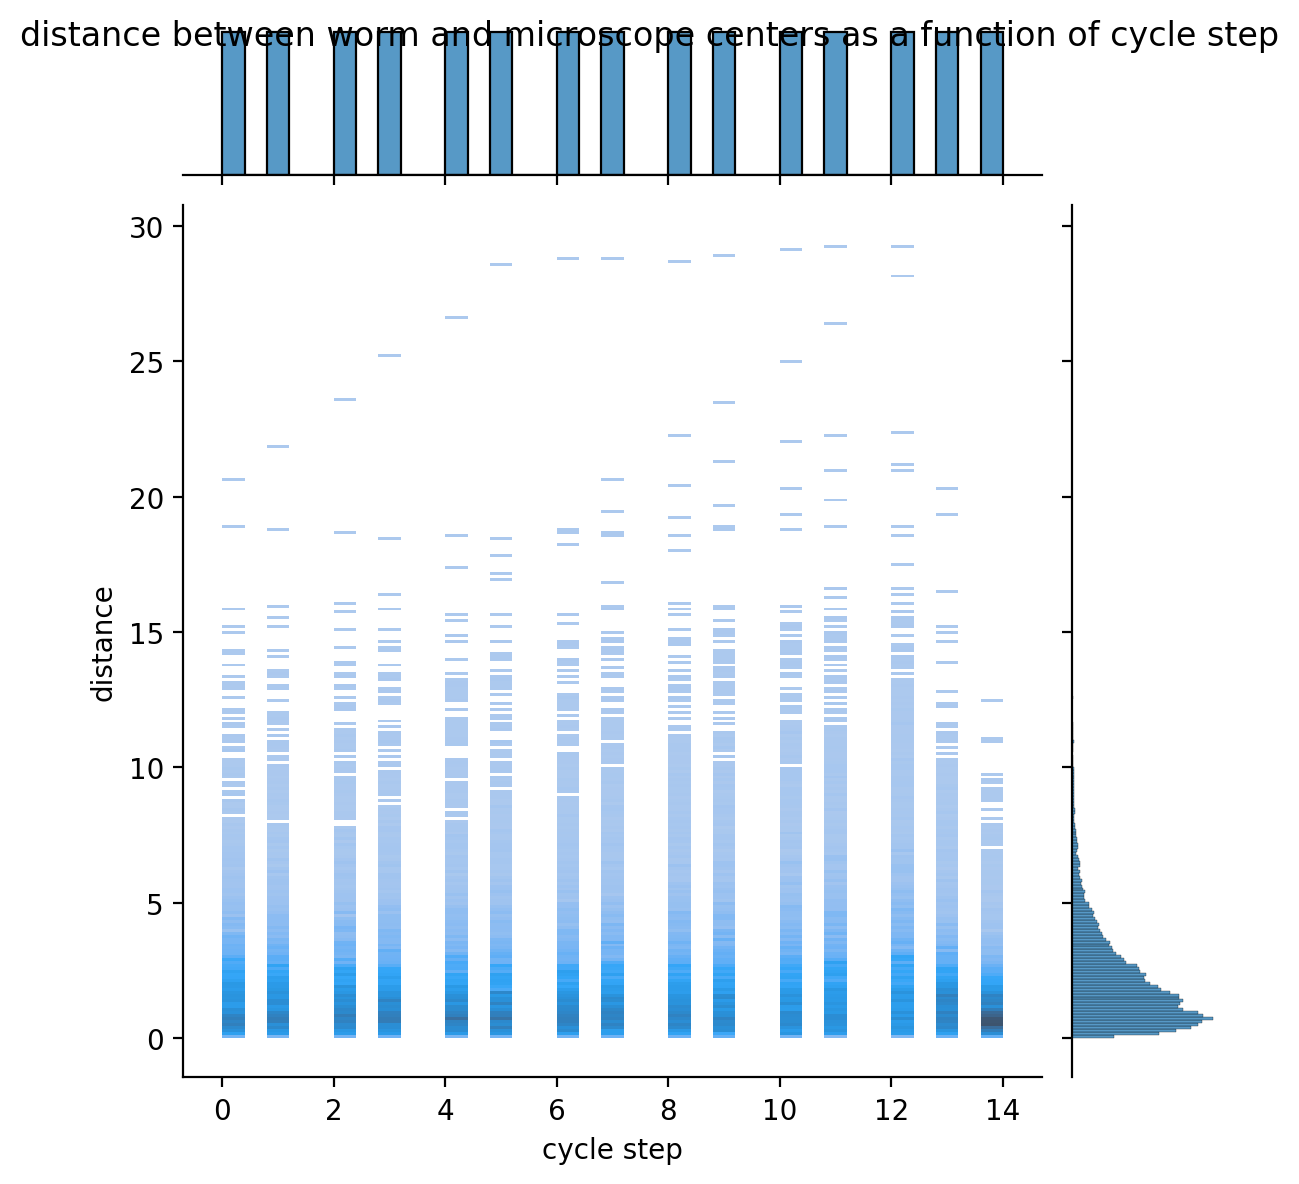

In [5]:
pltr.plot_deviation()

In [ ]:
pltr.plot_area_vs_speed_guy(n=1, window_size=1, hue='phase')

In [ ]:
pltr.plot_cycle_step_vs_speed()

In [ ]:
pltr.plot_trajectory(n=15, hue='wrm_speed')

In [ ]:
def plot_speed_vs_time(pltr, n: int = 1, window_size: int = 15, hue=None, condition=None) -> plt.Figure:
        data = pltr.data_prep_frames(n=n)
        data["wrm_speed_avg"] = Plotter.rolling_average(data, window_size=window_size, column="wrm_speed")
        fig, ax = plt.subplots()
        if condition is not None:
            mask = condition(data) & mask
        g = sns.histplot(data=data, x="wrm_speed", ax=ax, hue=hue)
        g.figure.suptitle(f"n = {n}, rolling window = {window_size}")
        return g.figure

In [ ]:
plot_speed_vs_time(pltr, n=15, window_size=1, hue='phase')

In [ ]:
timing_config.mm_per_px / timing_config.ms_per_frame

In [ ]:
def plot_2d_deviation_with_angle(pltr, n:int=1, hue="cycle_step", condition=None) -> plt.Figure:
        data = pltr.data_prep_frames(n=n)
        data["worm_center_dist_x"] = data["wrm_center_x"] - data["mic_center_x"]
        data["worm_center_dist_y"] = data["wrm_center_y"] - data["mic_center_y"]

        data["cycle_step"] = data["frame"] % pltr.timing_config.cycle_length
        min_h, min_w = np.min(data["wrm_h"]), np.min(data["wrm_w"])
        x_sign = np.sign(data["wrm_center_x"].diff(n))
        y_sign = np.sign(data["wrm_center_y"].diff(n))
        data['angle'] = np.arctan2((data['wrm_h']-min_h)*y_sign, (data['wrm_w']-min_w)*x_sign)
        if condition is not None:
            data = data[condition(data)]
        
        # display(data.head(50))
        # g = sns.histplot(data=data, x="angle")
        g = sns.jointplot(data=data, x="wrm_speed", y="angle", kind="scatter", hue=hue, alpha=0.6)
        # g = sns.jointplot(data=data, x="worm_center_dist_x", y="worm_center_dist_y", kind="scatter", hue=hue, alpha=0.6)
        # g.set_axis_labels("distance x", "distance y")
        # g.figure.suptitle(f"distance between worm and microscope centers in each axis")

        return g.figure

In [ ]:
plot_2d_deviation_with_angle(pltr, 5, hue=None, condition=lambda df: df['wrm_speed'] > -0.3)

In [ ]:
def plot_area_vs_time(pltr:Plotter, n: int = 1, window_size: int = 15, hue=None, condition=None) -> plt.Figure:
        data = pltr.data_prep_frames(n=n)
        data["wrm_speed_avg"] = Plotter.rolling_average(data, window_size=window_size, column="wrm_speed")
        data["worm_center_dist"] = np.sqrt(
            (data["wrm_center_x"] - data["mic_center_x"]) ** 2 + (data["wrm_center_y"] - data["mic_center_y"]) ** 2
        )
        data["cycle_step"] = data["frame"] % pltr.timing_config.cycle_length
        data['angle'] = np.arctan2(data['wrm_w'], data['wrm_h'])
        # fig, ax = plt.subplots()
        mask = data["bbox_area_diff"] > 1e-3
        if condition is not None:
            mask = condition(data) & mask
        g = sns.jointplot(
            data=data[mask], x="wrm_speed_avg", y="worm_center_dist", hue=hue, kind="scatter", dropna=True)
        g.figure.suptitle(f"n = {n}, rolling window = {window_size}")
        return g.figure

In [ ]:
plot_area_vs_time(pltr, n=18, window_size=1, hue='angle')

# Run Simulation

In [1]:
from evaluation.simulator import *
from evaluation.sim_controllers import *
from dataset.raw_dataset import ExperimentConfig
from dummy_reader import DummyReader
from evaluation.motor_controllers import *

base_path = "/Users/guycohen/Desktop/Bio-Project/"

## Run CSV Simulation

In [2]:
exp_base_path = base_path + "PolyfitControllerV2"

time_config = TimingConfig.load_json(base_path + "time_config.json")
# time_config = TimingConfig.load_json(base_path + "time_config_medium_micro.json")
exp_config = ExperimentConfig.load_json(base_path + "exp_config.json")
log_config = LogConfig(
    root_folder=exp_base_path,
    save_mic_view=False,
    save_cam_view=False,
    save_err_view=False,
)

In [3]:
from evaluation.sim_controllers.test_controller1 import TestController1
from evaluation.sim_controllers.guys_controllers import *
from evaluation.sim_controllers.csv_controller import CsvController
from evaluation.sim_controllers.optimal_controller import  OptimalController
from evaluation.sim_controllers.polyfit_controller import PolyfitController

log_path = "/Users/guycohen/Desktop/Bio-Project/eval/bboxes.csv"

# controller = CsvController(time_config, "/Users/guycohen/Desktop/Bio-Project/eval_corrected_movement/bboxes.csv")

# controller = TestController1(time_config, "/Users/guycohen/Desktop/Bio-Project/eval/bboxes.csv")
# controller = Controller2(time_config, "/Users/guycohen/Desktop/Bio-Project/eval_corrected_movement/bboxes.csv")
# controller = OptimalController(time_config, "/Users/guycohen/Desktop/Bio-Project/eval_corrected_movement/bboxes.csv")


weights = np.ones(11)
# weights = np.asanyarray([0.0477, 0.0002, 0. ,    0.0007, 0.0057, 0.042 , 0.1558, 0.6245 ,0.7627])
sample_frames = np.asanyarray(
    [
        0,
        5,
        9,
        -time_config.cycle_length + 0,
        -time_config.cycle_length + 5,
        -time_config.cycle_length + 9,
        -2 * time_config.cycle_length + 0,
        -2 * time_config.cycle_length + 5,
        -2 * time_config.cycle_length + 9,
        -3 * time_config.cycle_length + 9,
        -4 * time_config.cycle_length + 9,
    ]
)
controller = PolyfitController(time_config, log_path, degree=2, weights=weights, sample_times=sample_frames)


In [4]:

logging_controller = LoggingController(controller, log_config)
motor_controller = SineMotorController(time_config)
# motor_controller = SimpleMovementController(time_config, 0)

sim = Simulator(time_config, exp_config, logging_controller, reader=None, motor_controller=motor_controller)

In [5]:
sim.run()
time_config.save_json(exp_base_path + "/time_config.json")
exp_config.save_json(exp_base_path + "/exp_config.json")

Simulation Progress:   0%|          | 0/4080 [00:00<?, ?cycle/s]

## Real Simulation

In [ ]:
# experiment_config = ExperimentConfig(
#     name="exp1",
#     num_frames=61200,
#     frames_per_sec=60,
#     orig_resolution=(5300, 4600),
#     px_per_mm=90,
#     init_position=(1300, 1200),
# )
# experiment_config.save_json("/Users/guycohen/Desktop/Bio-Project/exp_config.json")

In [ ]:
"""time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.327, 0.327),
    frame_padding_value=(255, 255, 255),
)
time_config.save_json(base_path+"time_config_medium_micro.json")"""

In [ ]:

"""time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
)

log_config = LogConfig(
    root_folder=base_path,
    save_mic_view=False,
    save_cam_view=False,
)"""

# yolo_config = YoloConfig(model_path="yolov8m-trained.pt") 

# time_config.save_json(base_path+"time_config.json")
# log_config.save_json(base_path+"csv_log_config.json")
# yolo_config.save_json(base_path++"yolo_config.json")


# frames_path = "Archive/"
# reader = FrameReader.create_from_directory(frames_path)

# time_config = TimingConfig.load_json("logs/time_config.json")
# log_config = LogConfig.load_json("logs/log_config.json")
# yolo_config = YoloConfig.load_json("logs/yolo_config.json")


In [ ]:
print(time_config.imaging_frame_num + time_config.moving_frame_num)

In [ ]:

controller = LoggingController(time_config, yolo_config, log_config)
#controller = YoloController(time_config, yolo_config)
sim = Simulator(time_config, reader, controller)

In [ ]:
sim.run()

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [ ]:
from frame_reader import FrameReader

reader = FrameReader.create_from_directory("Archive/")

In [ ]:
from dataset.create.box_calculator import BoxCalculator
from dataset.create.sample_extractor import SampleExtractor

bbox_calc = BoxCalculator(reader)
extractor = SampleExtractor(bbox_calc)
extractor.create_all_samples(target_size=(400, 400), save_folder="samples")

In [ ]:
# TODO: IMPROVE
def find_boxes(image: np.ndarray) -> np.ndarray:
    # increase contrast of original image
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # remove gaussian noise
    smoothed = cv.GaussianBlur(image, (3, 3), 0)

    # apply threshold to image to convert it into black & white
    _, mask = cv.threshold(smoothed, 160, 255, cv.THRESH_BINARY_INV)

    # do some morphological magic to clean up noise from the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    # dilate to increase all object sizes in the mask
    kernel = np.ones((3, 3), np.uint8)
    mask = cv.dilate(mask, kernel, iterations=5)

    image[mask == 0] = 255
    cv.imshow("masked", image)

    # find contours
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Populate bounding boxes
    bbox_list = []
    for c in contours:
        area = cv.contourArea(c)

        if area < 500 or area > 4000:
            continue

        box = cv.boundingRect(c)
        bbox_list.append(box)

    # Turn our bboxes into 2d ndarray
    bboxes = np.asanyarray(bbox_list)
    return bboxes